In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd

In [6]:
covid_df = pd.read_csv("italy-covid-daywise.csv")
type(covid_df)

pandas.core.frame.DataFrame

In [7]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [8]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


In [9]:
covid_df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


In [10]:
covid_df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

In [11]:
covid_df.shape

(248, 4)

In [12]:
covid_df['new_cases'][246]

np.float64(975.0)

In [13]:
covid_df.at[246, 'new_cases']

np.float64(975.0)

In [14]:
covid_df.new_cases[200]

np.float64(231.0)

In [15]:
cases_df = covid_df[['date', 'new_cases']]
cases_df

,date,new_cases
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0
...,...,...
243,2020-08-30,1444.0
244,2020-08-31,1365.0
245,2020-09-01,996.0
246,2020-09-02,975.0


In [16]:
covid_df_copy = covid_df.copy()

Thare change kale sabu change hei jaesi, hetir lagi fast bhi ae. But jadi change kari kina dekhbar ache khali thare ta copy() method use kari parbu.

In [17]:
covid_df.loc[243]

date          2020-08-30
new_cases         1444.0
new_deaths           1.0
new_tests        53541.0
Name: 243, dtype: object

In [18]:
covid_df.head(5)

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


In [19]:
covid_df.tail(4)

,date,new_cases,new_deaths,new_tests
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN
247,2020-09-03,1326.0,6.0,NaN


In [20]:
covid_df.at[0, 'new_tests']

np.float64(nan)

In [21]:
covid_df.new_tests.first_valid_index()

111

In [22]:
covid_df.new_tests[108:113]

108        NaN
109        NaN
110        NaN
111     7841.0
112    28095.0
Name: new_tests, dtype: float64

In [23]:
covid_df.sample(10)

,date,new_cases,new_deaths,new_tests
241,2020-08-28,1409.0,5.0,65135.0
154,2020-06-02,178.0,60.0,25628.0
194,2020-07-12,188.0,7.0,23061.0
110,2020-04-19,3491.0,480.0,NaN
176,2020-06-24,113.0,18.0,30237.0
184,2020-07-02,182.0,21.0,29147.0
14,2020-01-14,0.0,0.0,NaN
51,2020-02-20,0.0,0.0,NaN
185,2020-07-03,201.0,30.0,25680.0
210,2020-07-28,168.0,5.0,25341.0


In [24]:
total_cases = covid_df.new_cases.sum()
total_deaths = covid_df.new_deaths.sum()
print("The overall cases are {} and the total number of reported deaths are {} ".format(total_cases, total_deaths))
print("Overall death rate in Italy is {:.2f}".format((total_deaths/total_cases)*100))

The overall cases are 271515.0 and the total number of reported deaths are 35497.0 
Overall death rate in Italy is 13.07


In [25]:
initial_tests = 935310
total_tests = initial_tests + covid_df.new_tests.sum()
total_tests

np.float64(5214766.0)

###  Querying and Sorting rows

In [26]:
high_new_cases = covid_df.new_cases>1000
high_new_cases

0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245    False
246    False
247     True
Name: new_cases, Length: 248, dtype: bool

In [27]:
covid_df[high_new_cases]

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


In [28]:
postitive_rate = 0.052

In [29]:
high_ratio_df = covid_df[covid_df.new_cases / covid_df.new_tests >postitive_rate]

In [30]:
high_ratio_df

,date,new_cases,new_deaths,new_tests
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0
114,2020-04-23,3370.0,437.0,37083.0
116,2020-04-25,3021.0,420.0,38676.0
117,2020-04-26,2357.0,415.0,24113.0
118,2020-04-27,2324.0,260.0,26678.0
120,2020-04-29,2091.0,382.0,38589.0
123,2020-05-02,1965.0,269.0,31231.0
124,2020-05-03,1900.0,474.0,27047.0


In [31]:
covid_df['positive_rate'] = covid_df.new_cases / covid_df.new_tests

In [32]:
covid_df

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


In [33]:
covid_df.drop(columns = ['positive_rate'], inplace = True)

In [34]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


### Sorting rows using column values

In [35]:
covid_df.sort_values('new_cases', ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
83,2020-03-23,5560.0,649.0,NaN
80,2020-03-20,5322.0,429.0,NaN
85,2020-03-25,5249.0,743.0,NaN
90,2020-03-30,5217.0,758.0,NaN
86,2020-03-26,5210.0,685.0,NaN


In [36]:
covid_df.sort_values('new_deaths', ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
88,2020-03-28,5959.0,971.0,NaN
89,2020-03-29,5974.0,887.0,NaN
92,2020-04-01,4053.0,839.0,NaN
91,2020-03-31,4050.0,810.0,NaN
82,2020-03-22,6557.0,795.0,NaN
95,2020-04-04,4585.0,764.0,NaN
94,2020-04-03,4668.0,760.0,NaN
90,2020-03-30,5217.0,758.0,NaN
85,2020-03-25,5249.0,743.0,NaN
93,2020-04-02,4782.0,727.0,NaN


In [37]:
covid_df.sort_values('new_cases').head(10)

,date,new_cases,new_deaths,new_tests
172,2020-06-20,-148.0,47.0,29875.0
0,2019-12-31,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
5,2020-01-05,0.0,0.0,NaN
6,2020-01-06,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
8,2020-01-08,0.0,0.0,NaN
9,2020-01-09,0.0,0.0,NaN


In [38]:
covid_df.loc[169:175]

,date,new_cases,new_deaths,new_tests
169,2020-06-17,210.0,34.0,33957.0
170,2020-06-18,328.0,43.0,32921.0
171,2020-06-19,331.0,66.0,28570.0
172,2020-06-20,-148.0,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0
174,2020-06-22,224.0,24.0,16152.0
175,2020-06-23,221.0,23.0,23225.0


In [39]:
covid_df.at[172, 'new_cases'] = (covid_df.at[171, 'new_cases'] + covid_df.at[173, 'new_cases'])/2

In [40]:
covid_df.loc[172]

date          2020-06-20
new_cases          297.5
new_deaths          47.0
new_tests        29875.0
Name: 172, dtype: object

In [41]:
covid_df.loc[169:175]

,date,new_cases,new_deaths,new_tests
169,2020-06-17,210.0,34.0,33957.0
170,2020-06-18,328.0,43.0,32921.0
171,2020-06-19,331.0,66.0,28570.0
172,2020-06-20,297.5,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0
174,2020-06-22,224.0,24.0,16152.0
175,2020-06-23,221.0,23.0,23225.0


### Working with dates

In [42]:
covid_df['date'] = pd.to_datetime(covid_df.date)

In [43]:
covid_df['date']

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

In [44]:
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday

In [45]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,1
1,2020-01-01,0.0,0.0,NaN,2020,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,3
3,2020-01-03,0.0,0.0,NaN,2020,1,4
4,2020-01-04,0.0,0.0,NaN,2020,1,5
...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2


In [46]:
covid_df_may = covid_df[covid_df.month == 5]
covid_df_may

,date,new_cases,new_deaths,new_tests,year,month,weekday
122,2020-05-01,1872.0,285.0,43732.0,2020,5,4
123,2020-05-02,1965.0,269.0,31231.0,2020,5,5
124,2020-05-03,1900.0,474.0,27047.0,2020,5,6
125,2020-05-04,1389.0,174.0,22999.0,2020,5,0
126,2020-05-05,1221.0,195.0,32211.0,2020,5,1
127,2020-05-06,1075.0,236.0,37771.0,2020,5,2
128,2020-05-07,1444.0,369.0,13665.0,2020,5,3
129,2020-05-08,1401.0,274.0,45428.0,2020,5,4
130,2020-05-09,1327.0,243.0,36091.0,2020,5,5
131,2020-05-10,1083.0,194.0,31384.0,2020,5,6


In [47]:
covid_df_may_metrics = covid_df_may[['new_cases', 'new_deaths', 'new_tests']]

In [48]:
covid_df_may_metrics

,new_cases,new_deaths,new_tests
122,1872.0,285.0,43732.0
123,1965.0,269.0,31231.0
124,1900.0,474.0,27047.0
125,1389.0,174.0,22999.0
126,1221.0,195.0,32211.0
127,1075.0,236.0,37771.0
128,1444.0,369.0,13665.0
129,1401.0,274.0,45428.0
130,1327.0,243.0,36091.0
131,1083.0,194.0,31384.0


In [49]:
covid_may_total = covid_df_may_metrics.sum()
covid_may_total

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [50]:
covid_df.new_tests.mean()

np.float64(31699.674074074075)

In [51]:
covid_df[covid_df.weekday == 6].new_tests.mean()

np.float64(28588.105263157893)

More tests were carried out on sundays.

## Grouping And Aggregation

In [52]:
monthly_groups = covid_df.groupby('month')
monthly_groups

In [53]:
monthly_groups[['new_cases', 'new_deaths', 'new_tests']].sum()

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,8217.5,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


In [54]:
covid_weekday_mean_df = covid_df.groupby('weekday')[['new_cases', 'new_deaths', 'new_tests']].mean()

In [55]:
covid_weekday_mean_df

,new_cases,new_deaths,new_tests
weekday,,,
0,1109.142857,124.800000,19826.700000
1,918.638889,129.944444,31166.900000
2,927.305556,144.750000,34665.210526
3,1095.666667,141.472222,34488.578947
4,1189.714286,144.885714,39225.684211
5,1198.528571,157.000000,34589.473684
6,1247.257143,159.457143,28588.105263


In [56]:
covid_df['total_cases'] = covid_df.new_cases.cumsum()
covid_df['total_deaths'] = covid_df.new_deaths.cumsum()
covid_df['total_tests'] = covid_df.new_tests.cumsum()+initial_tests
covid_df


,date,new_cases,new_deaths,new_tests,year,month,weekday,total_cases,total_deaths,total_tests
0,2019-12-31,0.0,0.0,NaN,2019,12,1,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,2,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,3,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,4,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,5,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,6,267298.5,35473.0,5117788.0
244,2020-08-31,1365.0,4.0,42583.0,2020,8,0,268663.5,35477.0,5160371.0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,269659.5,35483.0,5214766.0
246,2020-09-02,975.0,8.0,NaN,2020,9,2,270634.5,35491.0,NaN


In [57]:
from urllib.request import urlretrieve
urlretrieve('https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv', 
            'locations.csv')

('locations.csv', <http.client.HTTPMessage at 0x1e329cf0290>)

In [58]:
locations_df = pd.read_csv('locations.csv')

In [59]:
locations_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


In [60]:
locations_df[locations_df.location == 'Italy']

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [61]:
covid_df['location'] = 'Italy'

In [62]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,weekday,total_cases,total_deaths,total_tests,location
0,2019-12-31,0.0,0.0,NaN,2019,12,1,0.0,0.0,NaN,Italy
1,2020-01-01,0.0,0.0,NaN,2020,1,2,0.0,0.0,NaN,Italy
2,2020-01-02,0.0,0.0,NaN,2020,1,3,0.0,0.0,NaN,Italy
3,2020-01-03,0.0,0.0,NaN,2020,1,4,0.0,0.0,NaN,Italy
4,2020-01-04,0.0,0.0,NaN,2020,1,5,0.0,0.0,NaN,Italy
...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,6,267298.5,35473.0,5117788.0,Italy
244,2020-08-31,1365.0,4.0,42583.0,2020,8,0,268663.5,35477.0,5160371.0,Italy
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,269659.5,35483.0,5214766.0,Italy
246,2020-09-02,975.0,8.0,NaN,2020,9,2,270634.5,35491.0,NaN,Italy


In [63]:
merged_df = covid_df.merge(locations_df, on = 'location')

In [64]:
merged_df

,date,new_cases,new_deaths,new_tests,year,month,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,2019,12,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,2020,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,2020,1,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,2020,1,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,2020,1,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,6,267298.5,35473.0,5117788.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
244,2020-08-31,1365.0,4.0,42583.0,2020,8,0,268663.5,35477.0,5160371.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,269659.5,35483.0,5214766.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
246,2020-09-02,975.0,8.0,NaN,2020,9,2,270634.5,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [65]:
merged_df['cases_per_million'] = merged_df.total_cases * 1e6 /merged_df.population

In [66]:
merged_df['deaths_per_million'] = merged_df.total_deaths * 1e6 /merged_df.population
merged_df['tests_per_million'] = merged_df.total_tests * 1e6 /merged_df.population

In [67]:
merged_df

,date,new_cases,new_deaths,new_tests,year,month,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,NaN,2019,12,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,6,267298.5,35473.0,5117788.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4420.946386,586.700753,84644.943252
244,2020-08-31,1365.0,4.0,42583.0,2020,8,0,268663.5,35477.0,5160371.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4443.522614,586.766910,85349.238862
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,269659.5,35483.0,5214766.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4459.995818,586.866146,86248.897403
246,2020-09-02,975.0,8.0,NaN,2020,9,2,270634.5,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,4476.121695,586.998461,NaN


In [68]:
result_df = merged_df[['date',
                       'new_cases',
                       'total_cases',
                       'total_deaths',
                       'new_tests',
                       'total_tests',
                       'cases_per_million',
                       'deaths_per_million',
                       'tests_per_million']]
result_df

,date,new_cases,total_cases,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,267298.5,35473.0,53541.0,5117788.0,4420.946386,586.700753,84644.943252
244,2020-08-31,1365.0,268663.5,35477.0,42583.0,5160371.0,4443.522614,586.766910,85349.238862
245,2020-09-01,996.0,269659.5,35483.0,54395.0,5214766.0,4459.995818,586.866146,86248.897403
246,2020-09-02,975.0,270634.5,35491.0,NaN,NaN,4476.121695,586.998461,NaN


## Basic Plotting with Pandas

In [76]:
result_df.to_csv('results.csv', index = False)

In [77]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Matplotlib is building the font cache; this may take a moment.


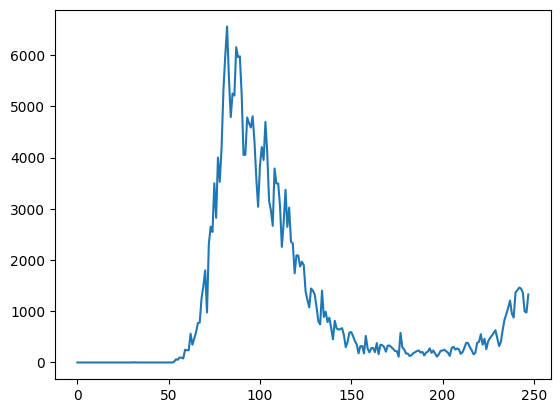

In [75]:
result_df.new_cases.plot();